In [22]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ (ÌååÏùº Í≤ΩÎ°úÏóê ÎßûÍ≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî)
df = pd.read_csv('/Users/kimgayeong/Desktop/Îç∞Ïù¥ÌÑ∞ÌÜ§/data 3/·Ñâ·Öµ·ÜØ·Ñâ·Ö≥·Ü∏·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/Îç∞Ïù¥ÌÑ∞ÌÜ§/data 3/raw_total_data.csv')

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏÉÅÏúÑ 5Ìñâ Î≥¥Í∏∞
print(df.head())

# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú Î∞è Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(df.info())

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ
print(df.describe())

# Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò
print(df.isnull().sum())

              Timestamp  OUTPUT_COUNT_DAY_1.xlsx  KO6_MOTOR_SET_FREQ.xlsx  \
0  2022-05-02 06:32:33                   25878.0                   3000.0   
1  2022-05-02 06:32:34                   25878.0                   3000.0   
2  2022-05-02 06:32:35                   25878.0                   3000.0   
3  2022-05-02 06:32:36                   25878.0                   3000.0   
4  2022-05-02 06:32:37                   25878.0                   3000.0   

   CUTTING_SET_FREQ.xlsx  STATUS.xlsx  KO5_MOTOR_SET_FREQ.xlsx  \
0                 3000.0          0.0                   3000.0   
1                 3000.0          0.0                   3000.0   
2                 3000.0          0.0                   3000.0   
3                 3000.0          0.0                   3000.0   
4                 3000.0          0.0                   3000.0   

   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  KO4_MOTOR_SET_FREQ.xlsx  \
0                            661.166                   3000.0   
1         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Timestamp                          579297 non-null  object 
 1   OUTPUT_COUNT_DAY_1.xlsx            579297 non-null  float64
 2   KO6_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 3   CUTTING_SET_FREQ.xlsx              579297 non-null  float64
 4   STATUS.xlsx                        579297 non-null  float64
 5   KO5_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 6   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  579297 non-null  float64
 7   KO4_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 8   KO2_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 9   MAIN_MOTOR_CURR.xlsx               579297 non-null  float64
 10  KO3_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 11  TRANS_POS_UP_SET_H.xlsx            5792

In [6]:
# Îç∞Ïù¥ÌÑ∞ ÏÉÅÏúÑ 5Ìñâ Î≥¥Í∏∞
print(df1.head())

# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú Î∞è Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(df1.info())

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÏöîÏïΩ
print(df1.describe())

# Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò
print(df1.isnull().sum())

   Unnamed: 0             Timestamp  OUTPUT_COUNT_DAY_1.xlsx  \
0           0  2022-05-02 06:32:33                   25878.0   
1           1  2022-05-02 06:32:34                       NaN   
2           2  2022-05-02 06:32:35                       NaN   
3           3  2022-05-02 06:32:36                       NaN   
4           4  2022-05-02 06:32:37                       NaN   

   KO6_MOTOR_SET_FREQ.xlsx  CUTTING_SET_FREQ.xlsx  STATUS.xlsx  \
0                   3000.0                 3000.0          0.0   
1                      NaN                    NaN          NaN   
2                      NaN                    NaN          NaN   
3                      NaN                    NaN          NaN   
4                      NaN                    NaN          NaN   

   KO5_MOTOR_SET_FREQ.xlsx  METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  \
0                   3000.0                            661.166   
1                      NaN                            798.000   
2                      

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         579297 non-null  int64  
 1   Timestamp                          579297 non-null  object 
 2   OUTPUT_COUNT_DAY_1.xlsx            472200 non-null  float64
 3   KO6_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 4   CUTTING_SET_FREQ.xlsx              30 non-null      float64
 5   STATUS.xlsx                        138 non-null     float64
 6   KO5_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 7   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  577321 non-null  float64
 8   KO4_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 9   KO2_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 10  MAIN_MOTOR_CURR.xlsx               553059 non-null  float64
 11  KO3_MOTOR_SET_FREQ.xlsx            31 n

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0        2022-05-02 06:32:33
1        2022-05-02 06:32:34
2        2022-05-02 06:32:35
3        2022-05-02 06:32:36
4        2022-05-02 06:32:37
                 ...        
579292   2022-05-14 04:34:32
579293   2022-05-14 04:34:33
579294   2022-05-14 04:34:39
579295   2022-05-14 04:34:40
579296   2022-05-14 04:34:46
Name: Timestamp, Length: 579297, dtype: datetime64[ns]

## Í∞ÄÏÑ§1. ÏÑ§ÎπÑ Í∞ÄÎèô ÏãúÍ∞ÑÏù¥ ÎßéÏùÑÏàòÎ°ù ÏÉùÏÇ∞ÎüâÏù¥ ÎßéÏùÑ Í≤É?

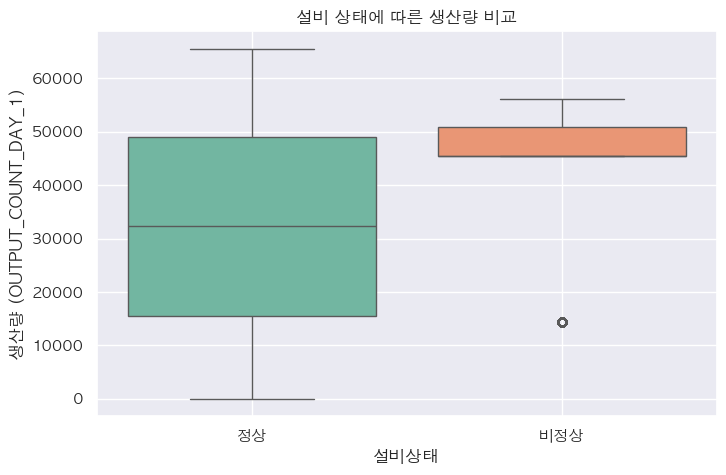

ÏÉÅÌÉúÎ≥Ñ ÏÉùÏÇ∞Îüâ ÌèâÍ∑†:
 ÏÑ§ÎπÑÏÉÅÌÉú
ÎπÑÏ†ïÏÉÅ    41661.630719
Ï†ïÏÉÅ     32369.645332
Name: OUTPUT_COUNT_DAY_1.xlsx, dtype: float64

T-test Í≤∞Í≥º: t = -29.812, p = 0.00000
‚Üí ÏÉùÏÇ∞ÎüâÏóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


In [30]:
from scipy.stats import ttest_ind

# 1. ÌïÑÏöîÌïú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
df_sub = df[['STATUS.xlsx', 'OUTPUT_COUNT_DAY_1.xlsx']].copy()

# 2. Ï†ïÏÉÅ/ÎπÑÏ†ïÏÉÅ ÏÉÅÌÉúÎßå ÌïÑÌÑ∞ÎßÅ
df_filtered = df_sub[df_sub['STATUS.xlsx'].isin([0.5, 2])]

# 3. ÏÉÅÌÉúÍ∞íÏùÑ ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôò (ÏãúÍ∞ÅÌôîÏö©)
df_filtered['ÏÑ§ÎπÑÏÉÅÌÉú'] = df_filtered['STATUS.xlsx'].map({0.5: 'ÎπÑÏ†ïÏÉÅ', 2: 'Ï†ïÏÉÅ'})

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
sns.boxplot(x='ÏÑ§ÎπÑÏÉÅÌÉú', y='OUTPUT_COUNT_DAY_1.xlsx', data=df_filtered, palette='Set2')
plt.title("ÏÑ§ÎπÑ ÏÉÅÌÉúÏóê Îî∞Î•∏ ÏÉùÏÇ∞Îüâ ÎπÑÍµê")
plt.ylabel("ÏÉùÏÇ∞Îüâ (OUTPUT_COUNT_DAY_1)")
plt.grid(True)
plt.show()

# 5. ÌèâÍ∑† ÎπÑÍµê
mean_prod = df_filtered.groupby('ÏÑ§ÎπÑÏÉÅÌÉú')['OUTPUT_COUNT_DAY_1.xlsx'].mean()
print("ÏÉÅÌÉúÎ≥Ñ ÏÉùÏÇ∞Îüâ ÌèâÍ∑†:\n", mean_prod)

# 6. ÌÜµÍ≥Ñ Í≤ÄÏ†ï (t-test)
group1 = df_filtered[df_filtered['ÏÑ§ÎπÑÏÉÅÌÉú'] == 'Ï†ïÏÉÅ']['OUTPUT_COUNT_DAY_1.xlsx']
group2 = df_filtered[df_filtered['ÏÑ§ÎπÑÏÉÅÌÉú'] == 'ÎπÑÏ†ïÏÉÅ']['OUTPUT_COUNT_DAY_1.xlsx']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

print(f"\nT-test Í≤∞Í≥º: t = {t_stat:.3f}, p = {p_val:.5f}")
if p_val < 0.05:
    print("‚Üí ÏÉùÏÇ∞ÎüâÏóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("‚Üí ÏÉùÏÇ∞Îüâ Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

In [33]:
corr = daily[['Operating_Hours', 'OUTPUT_COUNT_DAY_1.xlsx']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:\n", corr)

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                          Operating_Hours  OUTPUT_COUNT_DAY_1.xlsx
Operating_Hours                 1.000000                 0.950787
OUTPUT_COUNT_DAY_1.xlsx         0.950787                 1.000000


- 0.7 ~ 1.0 : Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

In [35]:
X = sm.add_constant(daily['Operating_Hours'])  # ÎèÖÎ¶Ω Î≥ÄÏàò (X)Ïóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
y = daily['OUTPUT_COUNT_DAY_1.xlsx']           # Ï¢ÖÏÜç Î≥ÄÏàò (y)
model = sm.OLS(y, X).fit()                     # ÌöåÍ∑Ä Î™®Îç∏ ÌîºÌåÖ
print(model.summary())                         # Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•

                               OLS Regression Results                              
Dep. Variable:     OUTPUT_COUNT_DAY_1.xlsx   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.894
Method:                      Least Squares   F-statistic:                     94.16
Date:                     Thu, 24 Jul 2025   Prob (F-statistic):           2.09e-06
Time:                             11:45:48   Log-Likelihood:                -247.25
No. Observations:                       12   AIC:                             498.5
Df Residuals:                           10   BIC:                             499.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

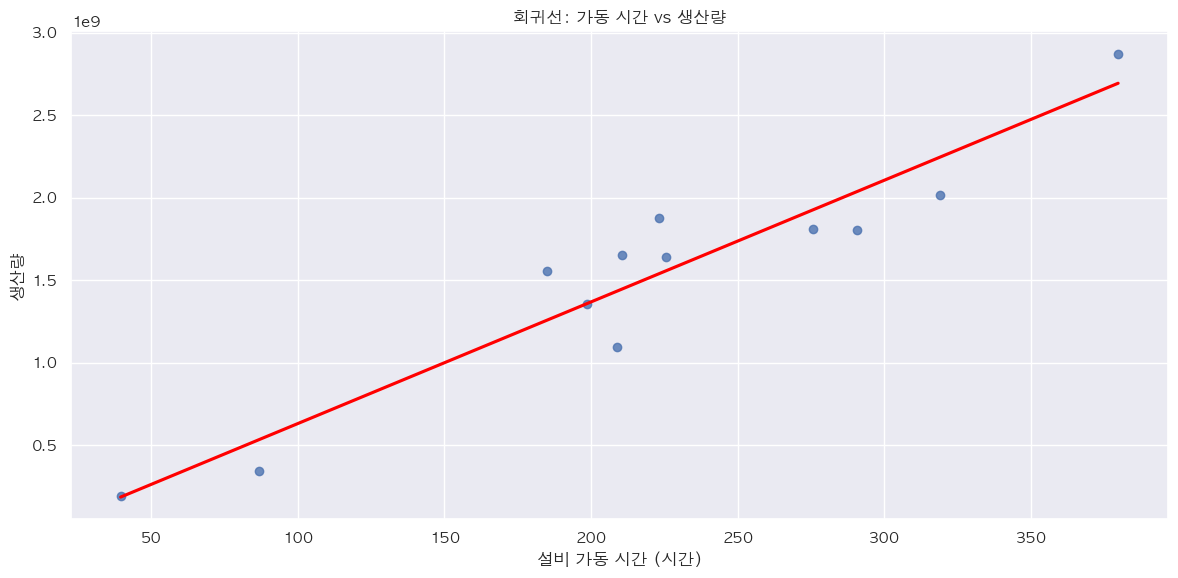

In [37]:
sns.regplot(
    data=daily,
    x='Operating_Hours',
    y='OUTPUT_COUNT_DAY_1.xlsx',
    ci=None,
    line_kws={"color": "red"}
)
plt.title('ÌöåÍ∑ÄÏÑ†: Í∞ÄÎèô ÏãúÍ∞Ñ vs ÏÉùÏÇ∞Îüâ')
plt.xlabel('ÏÑ§ÎπÑ Í∞ÄÎèô ÏãúÍ∞Ñ (ÏãúÍ∞Ñ)')
plt.ylabel('ÏÉùÏÇ∞Îüâ')
plt.grid(True)
plt.tight_layout()
plt.show()

### ÎπÑÌö®Ïú® Í≥ÑÏÇ∞ÌïòÍ∏∞ : Ìö®Ïú®ÏÑ± = ÏÉùÏÇ∞Îüâ / Í∞ÄÎèôÏãúÍ∞Ñ Í∞íÏù¥ ÎÇÆÏùå
=> Ï¶â, Í∞ôÏùÄ ÏãúÍ∞Ñ ÎèôÏïà ÏÉùÏÇ∞ÎüâÏù¥ Ï†ÅÏùÄ ÎπÑÌö®Ïú®

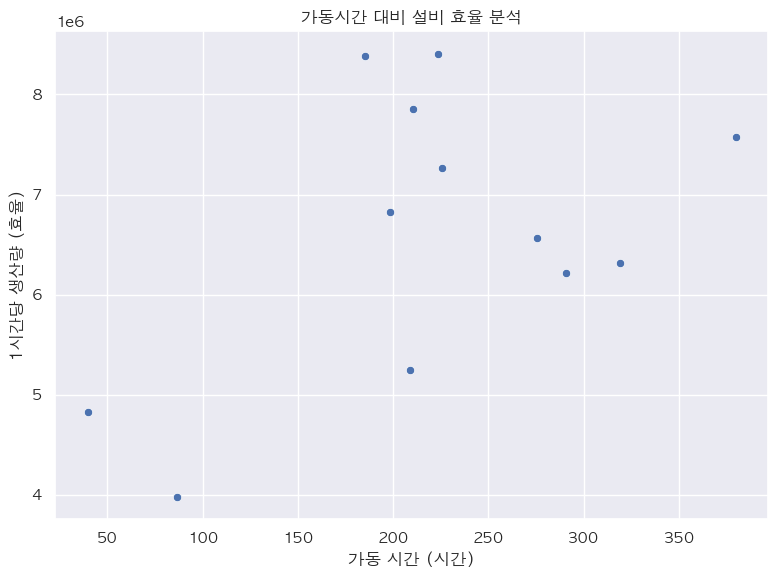

In [44]:
# Ìö®Ïú®ÏÑ± Í≥ÑÏÇ∞
daily['Efficiency'] = daily['OUTPUT_COUNT_DAY_1.xlsx'] / daily['Operating_Hours']

# ÏãúÍ∞ÅÌôî: Ìö®Ïú®ÏÑ± vs. Í∞ÄÎèôÏãúÍ∞Ñ
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily, x='Operating_Hours', y='Efficiency')
plt.title('Í∞ÄÎèôÏãúÍ∞Ñ ÎåÄÎπÑ ÏÑ§ÎπÑ Ìö®Ïú® Î∂ÑÏÑù')
plt.xlabel('Í∞ÄÎèô ÏãúÍ∞Ñ (ÏãúÍ∞Ñ)')
plt.ylabel('1ÏãúÍ∞ÑÎãπ ÏÉùÏÇ∞Îüâ (Ìö®Ïú®)')
plt.grid(True)
plt.tight_layout()
plt.show()

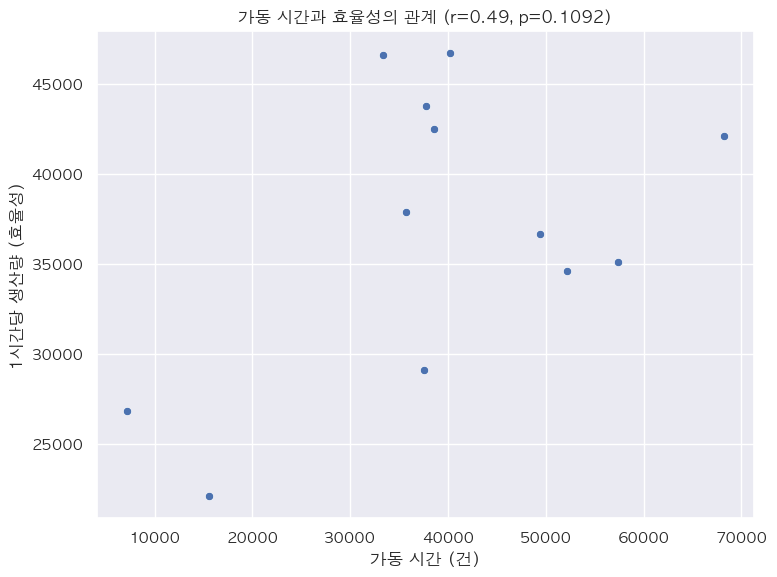

ÏÉÅÍ¥ÄÍ≥ÑÏàò (r): 0.4859
p-value: 0.1092


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# TimestampÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# STATUS.xlsxÍ∞Ä 2Ïùº Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ (Ï†ïÏÉÅ Í∞ÄÎèôÏãúÍ∞Ñ Í∏∞Ï§Ä)
df['Operating'] = df['STATUS.xlsx'].apply(lambda x: 1 if x == 2 else 0)

# ÌïòÎ£® Îã®ÏúÑÎ°ú Í∞ÄÎèôÏãúÍ∞ÑÍ≥º ÏÉùÏÇ∞Îüâ ÏßëÍ≥Ñ
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Operating': 'sum',
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum'
}).rename(columns={'Operating': 'Operating_Hours'})

# Ìö®Ïú®ÏÑ± Í≥ÑÏÇ∞: ÏãúÍ∞ÑÎãπ ÏÉùÏÇ∞Îüâ
daily['Efficiency'] = daily['OUTPUT_COUNT_DAY_1.xlsx'] / daily['Operating_Hours']

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_coef, p_value = pearsonr(daily['Operating_Hours'], daily['Efficiency'])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily, x='Operating_Hours', y='Efficiency')
plt.title(f'Í∞ÄÎèô ÏãúÍ∞ÑÍ≥º Ìö®Ïú®ÏÑ±Ïùò Í¥ÄÍ≥Ñ (r={corr_coef:.2f}, p={p_value:.4f})')
plt.xlabel('Í∞ÄÎèô ÏãúÍ∞Ñ (Í±¥)')
plt.ylabel('1ÏãúÍ∞ÑÎãπ ÏÉùÏÇ∞Îüâ (Ìö®Ïú®ÏÑ±)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò (r): {corr_coef:.4f}")
print(f"p-value: {p_value:.4f}")

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# TimestampÎ•º datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# ÏÑ§ÎπÑ Í∞ÄÎèô Ïó¨Î∂ÄÎ•º Ï†ïÎ¶¨ (STATUS.xlsx = 2Îäî Ï†ïÏÉÅ Í∞ÄÎèô ÏÉÅÌÉúÎ°ú Ï†ïÏùò)
df['Is_Operating'] = df['STATUS.xlsx'].apply(lambda x: 1 if x == 2 else 0)

# ÎÇ†ÏßúÎ≥ÑÎ°ú Í∞ÄÎèô ÏãúÍ∞ÑÍ≥º ÏÉùÏÇ∞Îüâ ÏßëÍ≥Ñ
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Is_Operating': 'sum',                      # ÌïòÎ£® ÎèôÏïà ÏÑ§ÎπÑÍ∞Ä Ï†ïÏÉÅ Í∞ÄÎèôÌïú ÌöüÏàò
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum'            # ÌïòÎ£® Ï¥ù ÏÉùÏÇ∞Îüâ
}).rename(columns={
    'Is_Operating': 'Operating_Hours',
    'OUTPUT_COUNT_DAY_1.xlsx': 'Daily_Output'
}).reset_index()

In [52]:
daily

Timestamp  Operating_Hours  Daily_Output
0   2022-05-02            40203  1.878084e+09
1   2022-05-03            57419  2.014342e+09
2   2022-05-04            52208  1.807177e+09
3   2022-05-05            37582  1.094634e+09
4   2022-05-06            68249  2.875344e+09
5   2022-05-07            15609  3.448908e+08
6   2022-05-09            37789  1.654554e+09
7   2022-05-10            35730  1.354184e+09
8   2022-05-11            33331  1.553108e+09
9   2022-05-12            49391  1.811038e+09
10  2022-05-13            38582  1.639379e+09
11  2022-05-14             7134  1.914200e+08

In [55]:
print(df['Timestamp'].dt.date.nunique())
print(df['Timestamp'].dt.date.value_counts().sort_index())

12
Timestamp
2022-05-02    62775
2022-05-03    63352
2022-05-04    62553
2022-05-05    41522
2022-05-06    78900
2022-05-07    15658
2022-05-09    45880
2022-05-10    46199
2022-05-11    46364
2022-05-12    62287
2022-05-13    46348
2022-05-14     7459
Name: count, dtype: int64


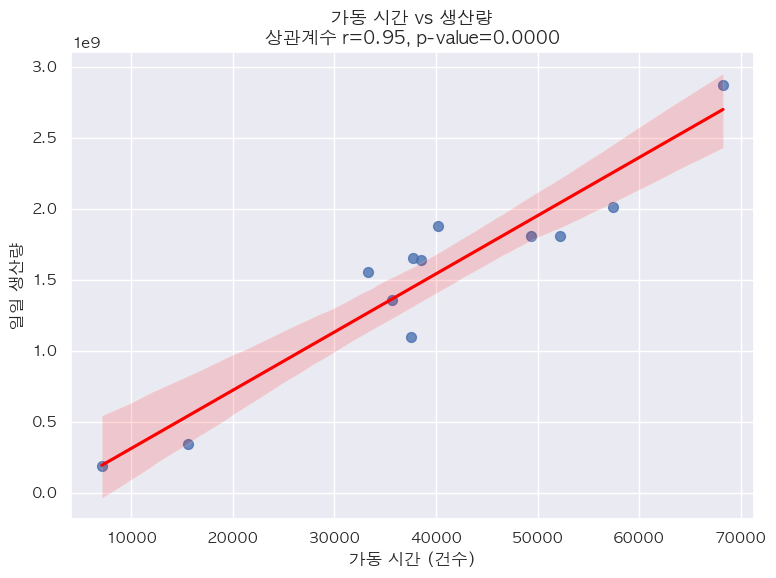

üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò (r): 0.9491
üìâ p-value: 0.0000


In [50]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr, pval = pearsonr(daily['Operating_Hours'], daily['Daily_Output'])

# ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.regplot(data=daily, x='Operating_Hours', y='Daily_Output', scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title(f'Í∞ÄÎèô ÏãúÍ∞Ñ vs ÏÉùÏÇ∞Îüâ\nÏÉÅÍ¥ÄÍ≥ÑÏàò r={corr:.2f}, p-value={pval:.4f}', fontsize=13)
plt.xlabel('Í∞ÄÎèô ÏãúÍ∞Ñ (Í±¥Ïàò)')
plt.ylabel('ÏùºÏùº ÏÉùÏÇ∞Îüâ')
plt.grid(True)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò (r): {corr:.4f}")
print(f"üìâ p-value: {pval:.4f}")

# ÏÉÅÍ¥ÄÍ≥ÑÏàò r

- r > 0: Í∞ÄÎèô ÏãúÍ∞Ñ ÎßéÏùÑÏàòÎ°ù ÏÉùÏÇ∞Îüâ Ï¶ùÍ∞Ä (ÏñëÏùò ÏÉÅÍ¥Ä)

- r ‚âà 0: Í∞ÄÎèô ÏãúÍ∞ÑÍ≥º ÏÉùÏÇ∞ÎüâÏóê ÌÅ∞ ÏÉÅÍ¥Ä ÏóÜÏùå

- r < 0: Í∞ÄÎèô ÏãúÍ∞Ñ ÎßéÏïÑÎèÑ ÏÉùÏÇ∞Îüâ Í∞êÏÜå ‚Üí ÎπÑÌö®Ïú®

# p-value

- p < 0.05: ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä

- p ‚â• 0.05: Ïö∞Ïó∞Ïùº Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨

# 2.ÏÉùÏÇ∞ÎüâÏù¥ ÎÜíÏùÑÏàòÎ°ù ÎπÑÌö®Ïú®Ïù¥ Ï†ÅÏùÑÍπå?

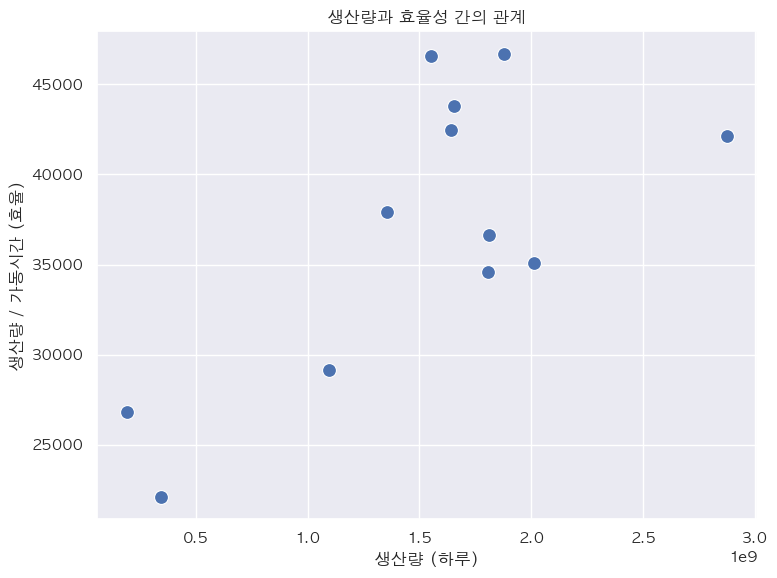

ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.712, p-value: 0.0094


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# ÎÇ†Ïßú Ïª¨ÎüºÏù¥ datetime ÌòïÌÉúÏù∏ÏßÄ ÌôïÏù∏
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 'ÏÑ§ÎπÑÍ∞ÄÎèô ÏãúÍ∞Ñ' = ÌïòÎ£® Ï§ë STATUSÍ∞Ä 2(Ï†ïÏÉÅ)Ïù∏ ÏãúÍ∞ÑÏùò Ìï©
df['is_operating'] = df['STATUS.xlsx'] == 2

# ÎÇ†Ïßú Îã®ÏúÑÎ°ú ÏßëÍ≥Ñ: ÌïòÎ£® ÏÉùÏÇ∞Îüâ, ÌïòÎ£® Í∞ÄÎèôÏãúÍ∞Ñ
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum',
    'is_operating': 'sum'  # Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Í∞ÄÎèôÎêú ÏãúÍ∞ÑÏùò Í∞úÏàò
}).rename(columns={
    'OUTPUT_COUNT_DAY_1.xlsx': 'daily_output',
    'is_operating': 'operating_hours'
})

# Ìö®Ïú®ÏÑ± ÏßÄÌëú Ï∂îÍ∞Ä
daily['efficiency'] = daily['daily_output'] / daily['operating_hours']

# ÏÇ∞Ï†êÎèÑÎ°ú ÏÉùÏÇ∞Îüâ vs Ìö®Ïú® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.scatterplot(data=daily, x='daily_output', y='efficiency', s=100)
plt.title('ÏÉùÏÇ∞ÎüâÍ≥º Ìö®Ïú®ÏÑ± Í∞ÑÏùò Í¥ÄÍ≥Ñ')
plt.xlabel('ÏÉùÏÇ∞Îüâ (ÌïòÎ£®)')
plt.ylabel('ÏÉùÏÇ∞Îüâ / Í∞ÄÎèôÏãúÍ∞Ñ (Ìö®Ïú®)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
corr, pval = pearsonr(daily['daily_output'], daily['efficiency'])
print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr:.3f}, p-value: {pval:.4f}")

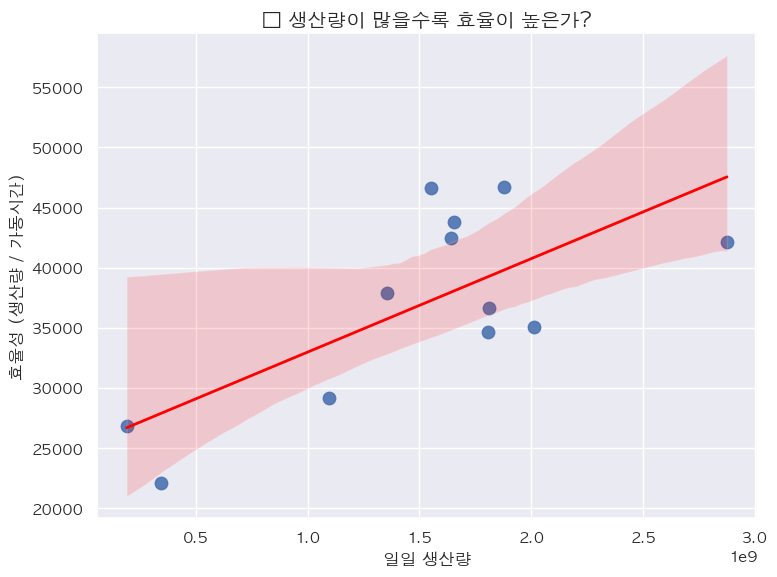

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    data=daily,
    x='daily_output',         # ÏÉùÏÇ∞Îüâ
    y='efficiency',           # Ìö®Ïú®ÏÑ± (ÏÉùÏÇ∞Îüâ / Í∞ÄÎèôÏãúÍ∞Ñ)
    scatter_kws={'s': 80, 'alpha': 0.9},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('üìà ÏÉùÏÇ∞ÎüâÏù¥ ÎßéÏùÑÏàòÎ°ù Ìö®Ïú®Ïù¥ ÎÜíÏùÄÍ∞Ä?', fontsize=14)
plt.xlabel('ÏùºÏùº ÏÉùÏÇ∞Îüâ', fontsize=12)
plt.ylabel('Ìö®Ïú®ÏÑ± (ÏÉùÏÇ∞Îüâ / Í∞ÄÎèôÏãúÍ∞Ñ)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from scipy.stats import pearsonr

corr, pval = pearsonr(daily['daily_output'], daily['efficiency'])
print(f"üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò r: {corr:.3f}")
print(f"üìâ p-value: {pval:.4f}")

üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò r: 0.712
üìâ p-value: 0.0094
